EDA Label
* Proporsi label (time frame)
* Data Splitting

EDA Feature
* Feature defenition

# Library

In [1]:
#Basic Statistic & Visualzation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization Function
from function.dev_vis import *

import os

# Dataset

In [2]:
dataset_path = r'C:\Users\juan\Documents\Portfolio Project\credit_score_2\dataset\train.csv'
#use index as id to identify data
dataset_raw = pd.read_csv(dataset_path)
dataset_raw.columns = dataset_raw.columns.str.lower()
dataset_raw.sample(5)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
88461,0x21c53,CUS_0x8ac4,June,Sakarif,22,511-55-3689,Entrepreneur,16203.89,1440.324167,6,...,_,2156.1,34.748516,6 Years and 10 Months,Yes,48.670488,118.69667981960873,Low_spent_Small_value_payments,266.6652488921389,Poor
61601,0x17ef3,CUS_0xaf56,February,Herbertg,43,808-71-5249,Musician,15081.42,1544.785000,8,...,Bad,3897.4,34.578760,NaN,Yes,110.791835,93.39614441463594,Low_spent_Medium_value_payments,230.29052023007202,Poor
34901,0xe27f,CUS_0x6754,June,Alexei Anishchukz,43,221-68-3307,Musician,15469.21,1156.100833,10,...,_,1820.35,38.324798,9 Years and 9 Months,Yes,38.676796,10.575047092263068,High_spent_Large_value_payments,306.3582403391855,Poor
5866,0x3860,CUS_0x5413,March,Erinx,36_,148-38-7097,Manager,22250.525,1945.210417,4,...,_,1443.78,26.416027,30 Years and 1 Months,NM,0.000000,96.21105510609249,Low_spent_Large_value_payments,368.3099865605742,Poor
74151,0x1c879,CUS_0xbe22,August,Deepap,35,648-20-4009,Scientist,38631.06,3046.255000,5,...,Standard,1168.71,35.595569,18 Years and 11 Months,No,0.000000,74.86549122423368,High_spent_Small_value_payments,489.7600087757663,Good


In [4]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  object 
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  object 
 8   monthly_inhand_salary     84998 non-null   float64
 9   num_bank_accounts         100000 non-null  int64  
 10  num_credit_card           100000 non-null  int64  
 11  interest_rate             100000 non-null  int64  
 12  num_of_loan               100000 non-null  object 
 13  type_of_loan              88592 non-null   ob

In [6]:
dataset_raw.describe()

,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,delay_from_due_date,num_credit_inquiries,credit_utilization_ratio,total_emi_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
dataset_raw.describe(include=object)

,id,customer_id,month,name,age,ssn,occupation,annual_income,num_of_loan,type_of_loan,num_of_delayed_payment,changed_credit_limit,credit_mix,outstanding_debt,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0xa500,CUS_0x25ac,February,Stevex,38,#F%$D@*&8,_______,17273.83,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


# Label Analysis

In [41]:
dataset_raw['credit_score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: credit_score, dtype: int64

In [64]:
dataset_raw['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [143]:
gb_1 = dataset_raw[['month','credit_score','id']].groupby(['month','credit_score']).count().reset_index()

gb_1.columns = ['month','grouping_cs','count']

pt_1 = pd.pivot_table(
    gb_1, values='count', index=['grouping_cs'],
    columns=['month'], aggfunc=np.sum) [['January','February','March','April','May','June','July','August']]

pt_1 = pt_1.transpose()
pt_1['total'] = pt_1['Good'] + pt_1['Poor'] + pt_1['Standard']
pt_1 = pt_1.transpose()

pt_1

month,January,February,March,April,May,June,July,August
grouping_cs,,,,,,,,
Good,1975,2016,1984,2357,2310,2362,2411,2413
Poor,3582,3539,3551,3670,3712,3728,3614,3602
Standard,6943,6945,6965,6473,6478,6410,6475,6485
total,12500,12500,12500,12500,12500,12500,12500,12500


In [144]:
pt_1_percent = pt_1.transpose()
pt_1_percent = pt_1_percent.div(pt_1_percent['total'], axis=0).mul(100).round(2).astype(str).add(' %')
pt_1_percent.transpose()

month,January,February,March,April,May,June,July,August
grouping_cs,,,,,,,,
Good,15.8 %,16.13 %,15.87 %,18.86 %,18.48 %,18.9 %,19.29 %,19.3 %
Poor,28.66 %,28.31 %,28.41 %,29.36 %,29.7 %,29.82 %,28.91 %,28.82 %
Standard,55.54 %,55.56 %,55.72 %,51.78 %,51.82 %,51.28 %,51.8 %,51.88 %
total,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %


In [145]:
df_gb_2 = dataset_raw[['month','credit_score','id']]
df_gb_2['cs_grouping'] = np.where(df_gb_2['credit_score']=='Standard','process',np.where(df_gb_2['credit_score']=='Good','process','reject'))
gb_2 = df_gb_2.groupby(['month','cs_grouping']).count().reset_index()[['month','cs_grouping','id']]
gb_2.columns = ['month','grouping_cs','count']

pt_2 = pd.pivot_table(
    gb_2, values='count', index=['grouping_cs'],
    columns=['month'], aggfunc=np.sum) [['January','February','March','April','May','June','July','August']]

pt_2 = pt_2.transpose()
pt_2['total'] = pt_2['process'] + pt_2['reject']
pt_2 = pt_2.transpose()

pt_2

month,January,February,March,April,May,June,July,August
grouping_cs,,,,,,,,
process,8918,8961,8949,8830,8788,8772,8886,8898
reject,3582,3539,3551,3670,3712,3728,3614,3602
total,12500,12500,12500,12500,12500,12500,12500,12500


In [146]:
pt_2_percent = pt_2.transpose()
pt_2_percent = pt_2_percent.div(pt_2_percent['total'], axis=0).mul(100).round(2).astype(str).add(' %')
pt_2_percent.transpose()

month,January,February,March,April,May,June,July,August
grouping_cs,,,,,,,,
process,71.34 %,71.69 %,71.59 %,70.64 %,70.3 %,70.18 %,71.09 %,71.18 %
reject,28.66 %,28.31 %,28.41 %,29.36 %,29.7 %,29.82 %,28.91 %,28.82 %
total,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %,100.0 %


# EDA

In [149]:
#preprocessing for visualization
ds_vis = dataset_raw.copy().drop(['id','customer_id'],axis=1)
ds_vis['credit_score'] = np.where(df_gb_2['credit_score']=='Standard','process',np.where(df_gb_2['credit_score']=='Good','process','reject'))

#feature
num = list(ds_vis.describe().columns)
cat = list(ds_vis.drop(['credit_score'],axis=1).describe(include=object).columns)

#Target
target = ds_vis['credit_score']

## Missing Values

In [151]:
#Null Value
ds_vis.isna().sum()

month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

In [152]:
#Missing value with string
for feature in cat:
    print(feature, f'\n' ,ds_vis[feature].unique())

month 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
name 
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
age 
 ['23' '-500' '28_' ... '4808_' '2263' '1342']
ssn 
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
occupation 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
annual_income 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
num_of_loan 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '

## Distribution

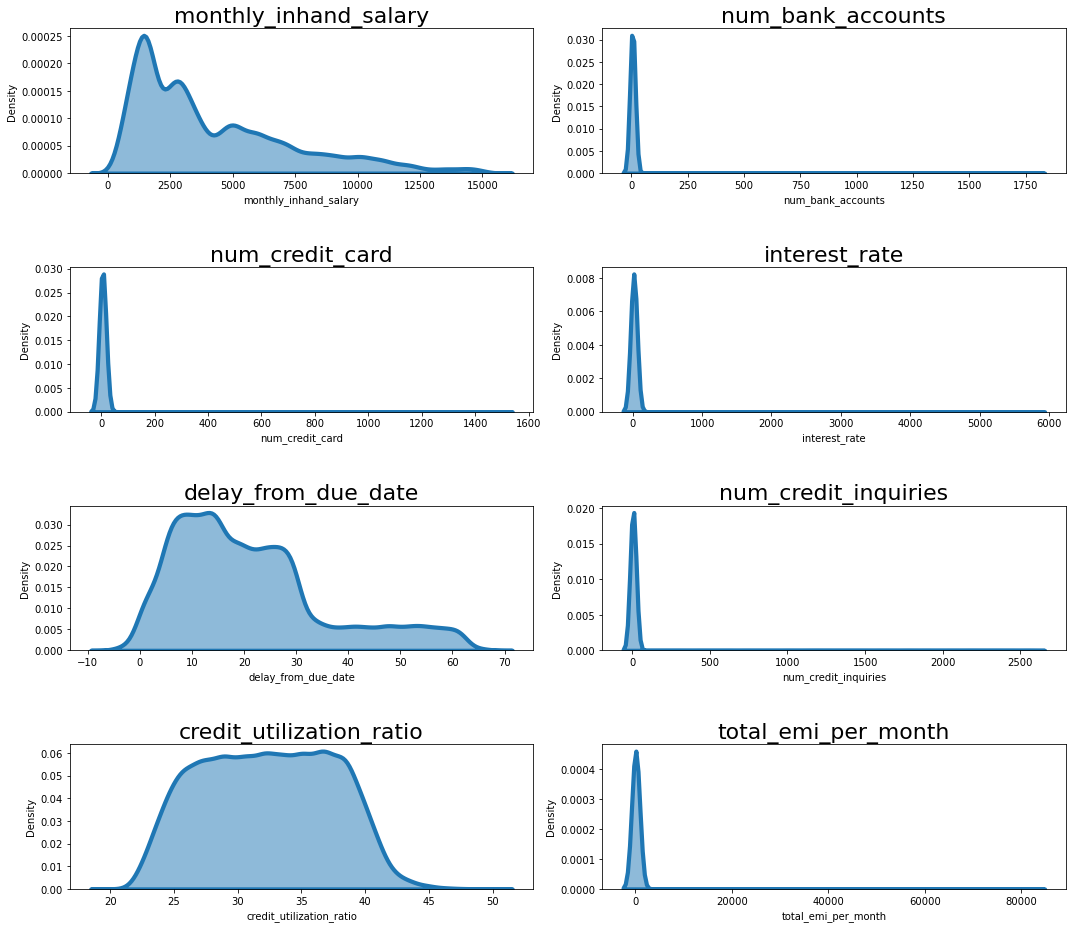

In [157]:
#Numerical
hist(ds_vis,num)

In [ ]:
#Categorical
bar(ds_vis, cat)